## NIMOハンズオン (関数の最適化)

In [1]:
import sys
sys.path.append('..')
import nimo

### AIとロボットのサイクルの回数を設定

In [2]:
CyclesNum = 30

### 目的関数の次元を設定

In [3]:
ObjectivesNum = 1

In [4]:
from descriptor import Desctiptor
des = Desctiptor()

### 実験条件候補データファイル名および提案条件のファイル名を設定

In [5]:
from pathlib import Path
TRIAL = 1
BATCH_SIZE = 24
out_dir = Path(f"./data_physbo_{TRIAL}")
out_dir.mkdir(exist_ok=True, parents=True)
Path(f"./data_physbo_{TRIAL}/fig").mkdir(exist_ok=True, parents=True)

In [6]:
candidates_file = f"./descriptor_search_space_physbo_{TRIAL}.csv"

proposals_file = f"./descriptor_proposals_physbo_{TRIAL}.csv"

### 結果を格納する場所を作成

In [7]:
res_history = nimo.history(input_file = candidates_file,
                             num_objectives = ObjectivesNum)

### 最適化計算

### 目的関数の推移を出力

In [9]:
nimo.visualization.plot_history.cycle(input_file = res_history,
                                      num_cycles = CyclesNum,
                                      fig_folder = f"./data_physbo_{TRIAL}/fig")

In [10]:
import numpy as np
tmp = []
X_tmp = []
for r in res_history:
    tmp.append(r[2][0])
    X_tmp.append(r[1])

tmp = np.array(tmp)
X_tmp = np.array(X_tmp)

In [11]:
from collections import defaultdict
sample_by_iter, objective_by_iter = defaultdict(list), defaultdict(list)
for r in res_history:
    objective_by_iter[r[0]].append(r[2][0])
    sample_by_iter[r[0]].append(r[1])

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


Text(0, 0.5, 'Objective')

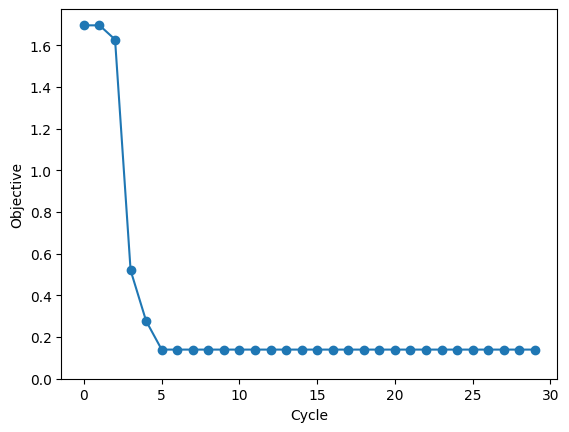

In [12]:
import matplotlib.pyplot as plt

print(objective_by_iter.keys())

fig, ax = plt.subplots()
tmp_history = [des.get_regret(max(objective_by_iter[1]))]
for i in range(1, CyclesNum):
    tmp_history.append(min(tmp_history[-1], des.get_regret(max(objective_by_iter[i]))))
ax.plot(range(CyclesNum), tmp_history, marker="o")
ax.set_xlabel("Cycle")
ax.set_ylim(0)
ax.set_ylabel("Objective")

In [13]:
# Save nested list object
import pickle
with open(out_dir / "objective_by_iter.pkl", "wb") as f:
    pickle.dump(objective_by_iter, f)
with open(out_dir / "sample_by_iter.pkl", "wb") as f:
    pickle.dump(sample_by_iter, f)